In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

import methods_comparison

# SFA

In [16]:
t = np.linspace(0, 200, 10000)
x = np.stack([np.sin(.25 * t), np.cos(t)]).T
y = x.dot(stats.ortho_group.rvs(4)[:2])
y += np.random.randn(*y.shape) / 4.
y -= y.mean(axis=0, keepdims=True)

In [17]:
y.shape

(10000, 4)

In [18]:
u, s, vh = np.linalg.svd(y)
whiten = vh.T.dot(np.diag(1./s))
yw = y.dot(whiten)
yp = np.diff(yw, axis=0)

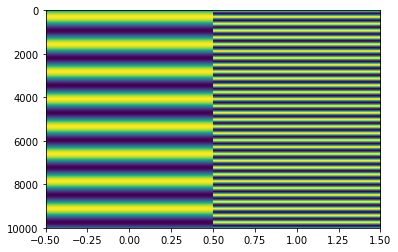

In [19]:
plt.imshow(x, aspect='auto')
plt.show()

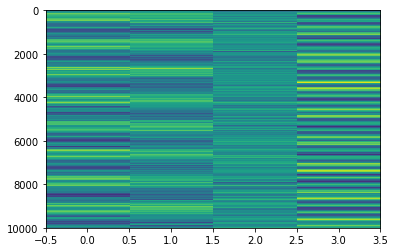

In [20]:
plt.imshow(y, aspect='auto')
plt.show()

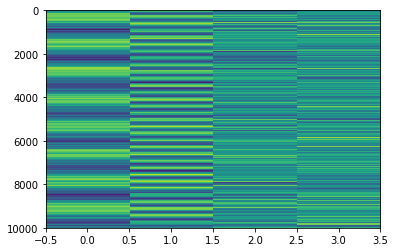

In [21]:
plt.imshow(yw, aspect='auto')
plt.show()

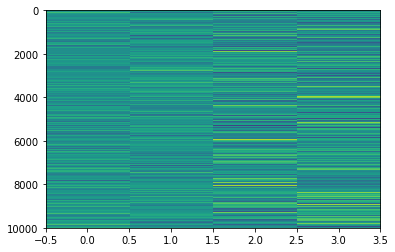

In [22]:
plt.imshow(yp, aspect='auto')
plt.show()

In [23]:
u, s, vh = np.linalg.svd(yp, full_matrices=False)
proj = vh.T

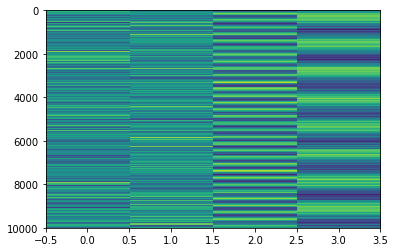

In [24]:
y_proj = y.dot(whiten.dot(proj))
plt.imshow(y_proj, aspect='auto')
plt.show()

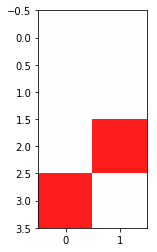

In [25]:
y_norm = y_proj - y_proj.mean(axis=0, keepdims=True)
y_norm /= np.linalg.norm(y_norm, axis=0, keepdims=True)
x_norm = x - x.mean(axis=0, keepdims=True)
x_norm /= np.linalg.norm(x_norm, axis=0, keepdims=True)
corr = y_norm.T.dot(x_norm)**2
plt.imshow(corr, vmin=-1, vmax=1, cmap='bwr')
plt.show()

In [26]:
corr

array([[5.75398152e-06, 2.13227528e-06],
       [2.00287795e-04, 1.32421380e-09],
       [2.06794498e-03, 8.85016755e-01],
       [8.87349791e-01, 2.17762144e-03]])

In [27]:
SFA = methods_comparison.SlowFeatureAnalysis(2)

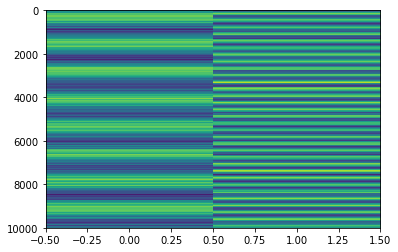

In [28]:
y_est = SFA.fit_transform(y)
plt.imshow(y_est, aspect='auto')
plt.show()

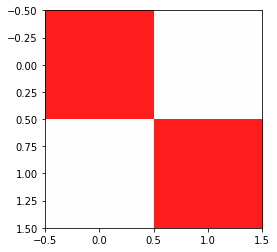

In [29]:
y_norm = y_est - y_est.mean(axis=0, keepdims=True)
y_norm /= np.linalg.norm(y_norm, axis=0, keepdims=True)
corr = y_norm.T.dot(x_norm)**2
plt.imshow(corr, vmin=-1, vmax=1, cmap='bwr')
plt.show()

In [30]:
corr

array([[0.88734979, 0.00217762],
       [0.00206794, 0.88501675]])